In [2]:

import os
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import mutual_info_classif
from matplotlib.ticker import FuncFormatter

df = pd.read_csv('wildfires_greather_than_100acres_with_temperature.csv')

# Mostrar primeras filas
df.head()

,FIRE_YEAR,DISCOVERY_DATE,DISCOVERY_DOY,NWCG_CAUSE_CLASSIFICATION,NWCG_GENERAL_CAUSE,LATITUDE,LONGITUDE,FIRE_SIZE,OWNER_DESCR,FIRE_SIZE_CLASS,STATE,DATE,TMAX
0,2004,10/6/2004,280,Human,Equipment and vehicle use,38.523333,-120.211667,16823.0,USFS,G,CA,2004-10-06,21.3
1,2004,10/13/2004,287,Human,Power generation/transmission/distribution,38.780000,-120.260000,7700.0,USFS,G,CA,2004-10-13,24.7
2,2005,2/12/2005,43,Human,Debris and open burning,36.001667,-81.590000,125.0,MISSING/NOT SPECIFIED,D,NC,2005-02-12,10.5
3,2005,7/16/2005,197,Natural,Natural,43.899167,-102.954722,119.0,USFS,D,SD,2005-07-16,40.1
4,2005,7/16/2005,197,Natural,Natural,43.892778,-102.948056,119.0,USFS,D,SD,2005-07-16,39.7


In [3]:
df.describe()

,FIRE_YEAR,DISCOVERY_DOY,LATITUDE,LONGITUDE,FIRE_SIZE,TMAX
count,60713.000000,60713.000000,60713.000000,60713.000000,60713.000000,12822.000000
mean,2006.523282,171.324082,38.172772,-103.085502,2795.894464,26.413235
std,7.887377,83.419660,7.632492,16.506598,15969.315245,7.567415
min,1992.000000,1.000000,17.950000,-178.802600,100.030000,-10.100000
25%,2000.000000,97.000000,33.463417,-114.408600,162.000000,21.600000
50%,2007.000000,181.000000,36.710300,-101.324200,300.000000,27.200000
75%,2013.000000,227.000000,42.518350,-92.483330,900.000000,32.100000
max,2020.000000,366.000000,70.138100,-65.325278,662700.000000,46.200000


In [4]:
# Agrupa por 'Categoría' y calcula el promedio de 'Valor'
AVerage_number_by_year = df.groupby('FIRE_YEAR')['FIRE_SIZE'].mean()

print(AVerage_number_by_year)

FIRE_YEAR
1992    1388.019397
1993    1425.571104
1994    1686.482044
1995    1061.029662
1996    2432.382025
1997    2828.955220
1998    1170.406307
1999    2413.891493
2000    2461.126523
2001    1637.704620
2002    3860.176911
2003    2537.057293
2004    6206.472430
2005    3634.453028
2006    2376.228434
2007    3463.893800
2008    1769.161713
2009    2543.809368
2010    1559.287322
2011    2643.774917
2012    3885.477504
2013    3516.418040
2014    2310.901166
2015    4581.262209
2016    2131.845403
2017    3905.515353
2018    3744.838061
2019    3143.415467
2020    5195.396338
Name: FIRE_SIZE, dtype: float64


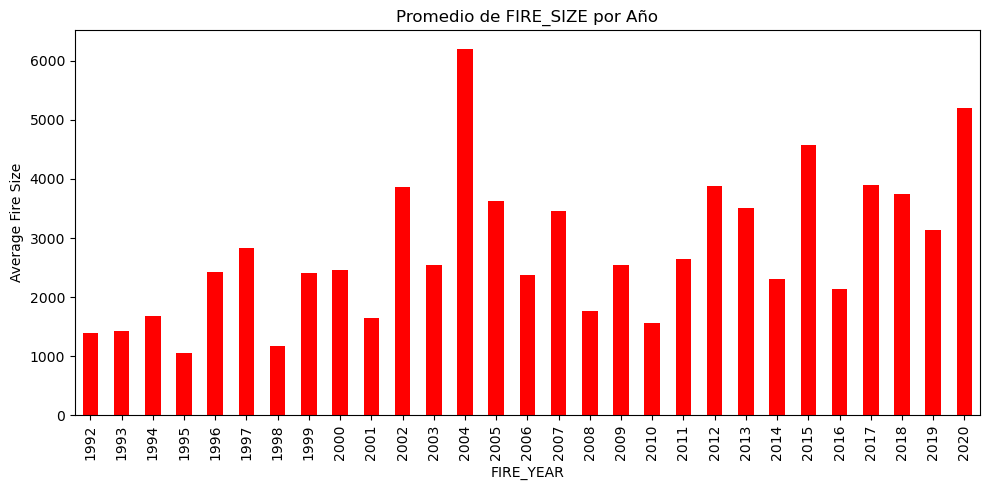

In [5]:
AVerage_number_by_year.plot(kind='bar', figsize=(10,5), color='red', title='Promedio de FIRE_SIZE por Año')
plt.ylabel('Average Fire Size')
plt.tight_layout()
plt.show()


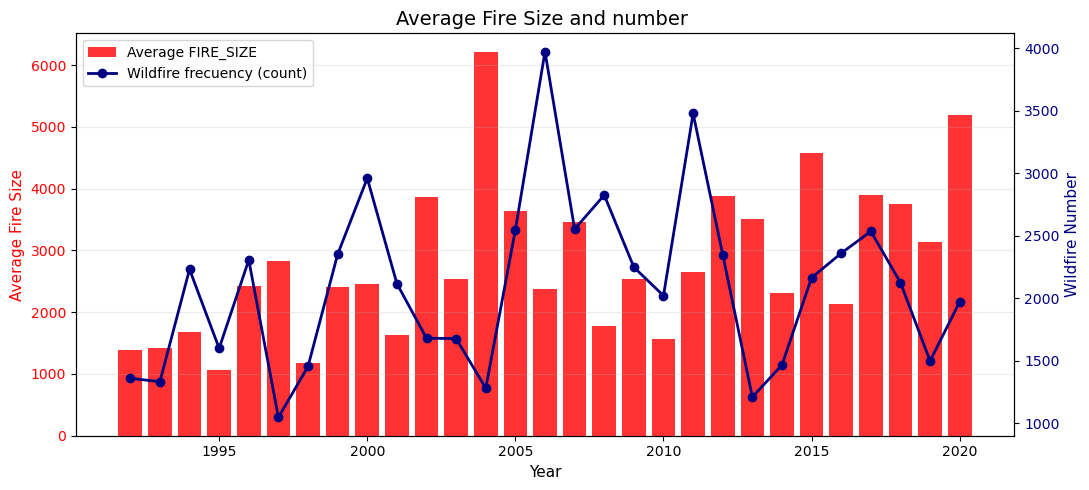

In [6]:
import matplotlib.pyplot as plt

# --- Agregaciones ---
# Serie que ya tienes (promedio)
avg_by_year = df.groupby('FIRE_YEAR')['FIRE_SIZE'].mean()

# Conteo anual de incendios
count_by_year = df.groupby('FIRE_YEAR')['FIRE_SIZE'].size()  # o .count(), equivalentes aquí

# Asegurar que ambos estén alineados por año (por si faltan años en alguno)
years = sorted(set(avg_by_year.index).union(count_by_year.index))
avg_by_year = avg_by_year.reindex(years)
count_by_year = count_by_year.reindex(years)

# --- Gráfico ---
fig, ax1 = plt.subplots(figsize=(11, 5))

# Barras: Promedio FIRE_SIZE
bars = ax1.bar(years, avg_by_year.values, color='red', alpha=0.8, label='Average FIRE_SIZE')
ax1.set_xlabel('Year', fontsize=11)
ax1.set_ylabel('Average Fire Size', color='red', fontsize=11)
ax1.tick_params(axis='y', labelcolor='red')
ax1.set_title('Average Fire Size and number ', fontsize=14)
ax1.grid(axis='y', alpha=0.25)

# Eje secundario: línea con conteo
ax2 = ax1.twinx()
line = ax2.plot(years, count_by_year.values, color='navy', marker='o', linewidth=2, label='Wildfire frecuency (count)')
ax2.set_ylabel('Wildfire Number', color='navy', fontsize=11)
ax2.tick_params(axis='y', labelcolor='navy')

# --- Leyenda combinada (barras + línea) ---
lines = [bars, line[0]]
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc='upper left')

plt.tight_layout()
plt.show()

In [14]:
 df.columns = [c.strip().upper() for c in df.columns]
 # Fechas: DISCOVERY_DATE (m/d/Y) y DATE (YYYY-MM-DD)
if "DISCOVERY_DATE" in df.columns:
        df["DISCOVERY_DATE"] = pd.to_datetime(df["DISCOVERY_DATE"], errors="coerce", format="%m/%d/%Y")
if "DATE" in df.columns:
        df["DATE"] = pd.to_datetime(df["DATE"], errors="coerce", format="%Y-%m-%d")

    # Usa DATE si existe, si no DISCOVERY_DATE
if "DATE" in df.columns:
        df["EVENT_DATE"] = df["DATE"]
elif "DISCOVERY_DATE" in df.columns:
        df["EVENT_DATE"] = df["DISCOVERY_DATE"]
else:
        raise ValueError("No se encontraron columnas de fecha ('DATE' o 'DISCOVERY_DATE').")

# Tipificar otras columnas
cat_cols = [
        "NWCG_CAUSE_CLASSIFICATION",
        "NWCG_GENERAL_CAUSE",
        "OWNER_DESCR",
        "FIRE_SIZE_CLASS",
        "STATE"
    ]
for c in cat_cols:
        if c in df.columns:
            df[c] = df[c].astype("category")

    # Numéricos
for num in ["LATITUDE", "LONGITUDE", "FIRE_SIZE", "TMAX", "DISCOVERY_DOY", "FIRE_YEAR"]:
        if num in df.columns:
            df[num] = pd.to_numeric(df[num], errors="coerce")


In [15]:
# Time Features
dt = df["DISCOVERY_DATE"]  
df["YEAR"] = dt.dt.year
df["MONTH"] = dt.dt.month
df["DOY"] = dt.dt.dayofyear
df["WEEKDAY"] = dt.dt.weekday  # 0=Lunes

month_to_season = {12: "Winter", 1: "Winter", 2: "Winter",
                       3: "Spring", 4: "Spring", 5: "Spring",
                       6: "Summer", 7: "Summer", 8: "Summer",
                       9: "Fall", 10: "Fall", 11: "Fall"}
df["SEASON"] = df["MONTH"].map(month_to_season).astype("category")

df.head()

,FIRE_YEAR,DISCOVERY_DATE,DISCOVERY_DOY,NWCG_CAUSE_CLASSIFICATION,NWCG_GENERAL_CAUSE,LATITUDE,LONGITUDE,FIRE_SIZE,OWNER_DESCR,FIRE_SIZE_CLASS,STATE,DATE,TMAX,EVENT_DATE,YEAR,MONTH,DOY,WEEKDAY,SEASON
0,2004,2004-10-06,280,Human,Equipment and vehicle use,38.523333,-120.211667,16823.0,USFS,G,CA,2004-10-06,21.3,2004-10-06,2004,10,280,2,Fall
1,2004,2004-10-13,287,Human,Power generation/transmission/distribution,38.780000,-120.260000,7700.0,USFS,G,CA,2004-10-13,24.7,2004-10-13,2004,10,287,2,Fall
2,2005,2005-02-12,43,Human,Debris and open burning,36.001667,-81.590000,125.0,MISSING/NOT SPECIFIED,D,NC,2005-02-12,10.5,2005-02-12,2005,2,43,5,Winter
3,2005,2005-07-16,197,Natural,Natural,43.899167,-102.954722,119.0,USFS,D,SD,2005-07-16,40.1,2005-07-16,2005,7,197,5,Summer
4,2005,2005-07-16,197,Natural,Natural,43.892778,-102.948056,119.0,USFS,D,SD,2005-07-16,39.7,2005-07-16,2005,7,197,5,Summer


In [26]:
# quality_checks(df):
print("\n=== Visión general ===")
print("Filas, columnas:", df.shape)
print("\nTipos de datos:")
print(df.dtypes)
print("\nValores faltantes (top 20):")
print(df.isna().sum().sort_values(ascending=False).head(20))


=== Visión general ===
Filas, columnas: (60713, 19)

Tipos de datos:
FIRE_YEAR                             int64
DISCOVERY_DATE               datetime64[ns]
DISCOVERY_DOY                         int64
NWCG_CAUSE_CLASSIFICATION          category
NWCG_GENERAL_CAUSE                 category
LATITUDE                            float64
LONGITUDE                           float64
FIRE_SIZE                           float64
OWNER_DESCR                        category
FIRE_SIZE_CLASS                    category
STATE                              category
DATE                         datetime64[ns]
TMAX                                float64
EVENT_DATE                   datetime64[ns]
YEAR                                  int32
MONTH                                 int32
DOY                                   int32
WEEKDAY                               int32
SEASON                             category
dtype: object

Valores faltantes (top 20):
TMAX                         47891
FIRE_YEAR       

In [29]:
# Rangos plausibles
if "LATITUDE" in df.columns and "LONGITUDE" in df.columns:
    invalid_lat = df[(df["LATITUDE"] < -90) | (df["LATITUDE"] > 90)].shape[0]
    invalid_lon = df[(df["LONGITUDE"] < -180) | (df["LONGITUDE"] > 180)].shape[0]
print(f"\nLatitudes fuera de rango: {invalid_lat}")
print(f"Longitudes fuera de rango: {invalid_lon}")


Latitudes fuera de rango: 0
Longitudes fuera de rango: 0


In [32]:
if "TMAX" in df.columns:
    tmin, tmax = df["TMAX"].min(skipna=True), df["TMAX"].max(skipna=True)
print(f"\nRango TMAX: [{tmin:.2f}, {tmax:.2f}] (°C esperados ~[-30, 60])")


Rango TMAX: [-10.10, 46.20] (°C esperados ~[-30, 60])


In [33]:
if "FIRE_SIZE" in df.columns:
    smin, smax = df["FIRE_SIZE"].min(skipna=True), df["FIRE_SIZE"].max(skipna=True)
print(f"Rango FIRE_SIZE: [{smin:.2f}, {smax:.2f}]")

Rango FIRE_SIZE: [100.03, 662700.00]


In [34]:
# Duplicados básicos por (lat, lon, fecha)
if set(["LATITUDE", "LONGITUDE", "EVENT_DATE"]).issubset(df.columns):
     dups = df.duplicated(subset=["LATITUDE", "LONGITUDE", "EVENT_DATE"]).sum()
print(f"\nPosibles duplicados (misma lat/lon/fecha): {dups}")


Posibles duplicados (misma lat/lon/fecha): 109


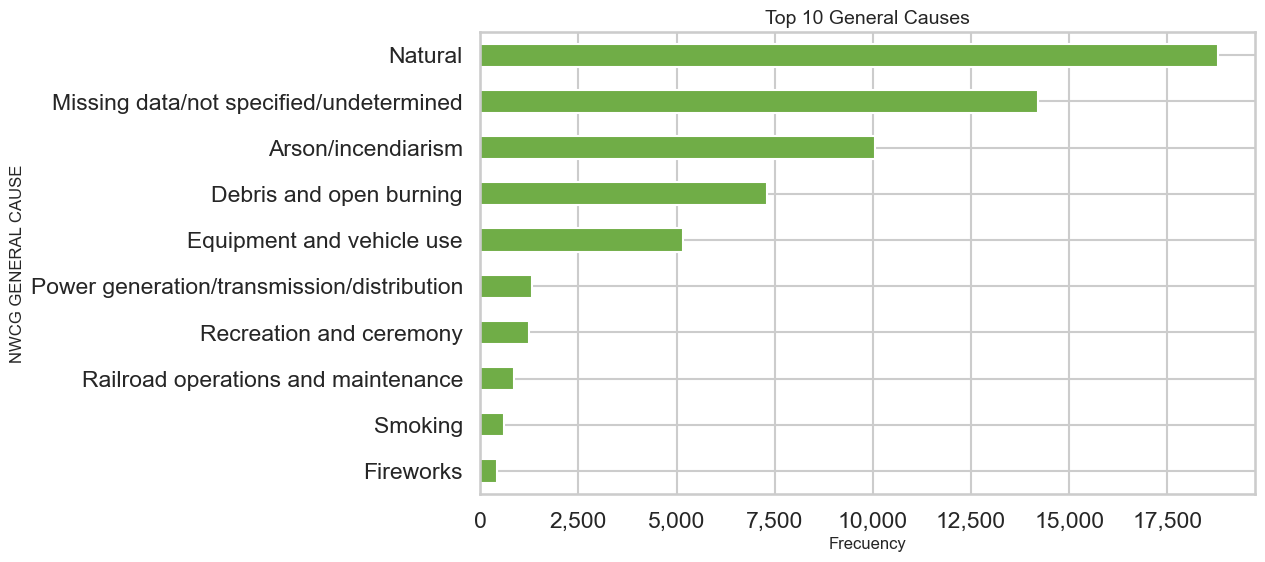

In [45]:
# plot_top_categories(df, col, outdir, top=15, title=None):
vc = df["NWCG_GENERAL_CAUSE"].astype(str).value_counts().head(10)[::-1]
ax = vc.plot(kind="barh", color="#70AD47")
plt.title("Top 10 General Causes")
plt.xlabel("Frecuency")
plt.ylabel("NWCG GENERAL CAUSE")
plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x, p: f"{int(x):,}"))
   # savefig_tight(os.path.join(outdir, f"02_top_{col.lower()}.png"))
plt.show()

In [16]:
monthly = df.groupby("MONTH").size()

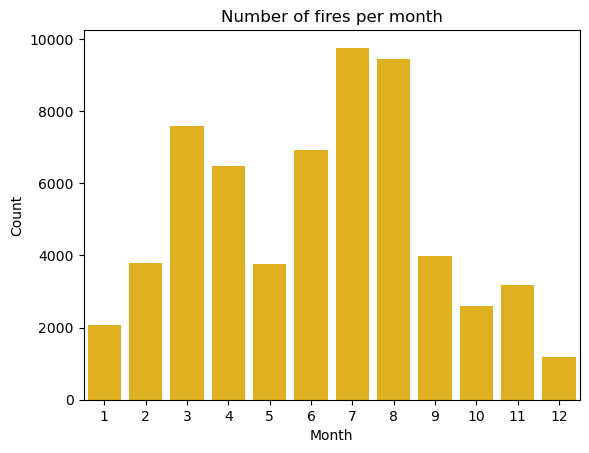

In [17]:

sns.barplot(x=monthly.index, y=monthly.values, color="#FFC000")
plt.title("Number of fires per month")
plt.xlabel("Month")
plt.ylabel("Count")
# savefig_tight(os.path.join(outdir, "08_incendios_por_mes.png"))
plt.show()


=== Visión general ===
Filas, columnas: (60713, 19)

Tipos de datos:
FIRE_YEAR                             int64
DISCOVERY_DATE               datetime64[ns]
DISCOVERY_DOY                         int64
NWCG_CAUSE_CLASSIFICATION          category
NWCG_GENERAL_CAUSE                 category
LATITUDE                            float64
LONGITUDE                           float64
FIRE_SIZE                           float64
OWNER_DESCR                        category
FIRE_SIZE_CLASS                    category
STATE                              category
DATE                         datetime64[ns]
TMAX                                float64
EVENT_DATE                   datetime64[ns]
YEAR                                  int32
MONTH                                 int32
DOY                                   int32
WEEKDAY                               int32
SEASON                             category
dtype: object

Valores faltantes (top 20):
TMAX                         47891
FIRE_YEAR       

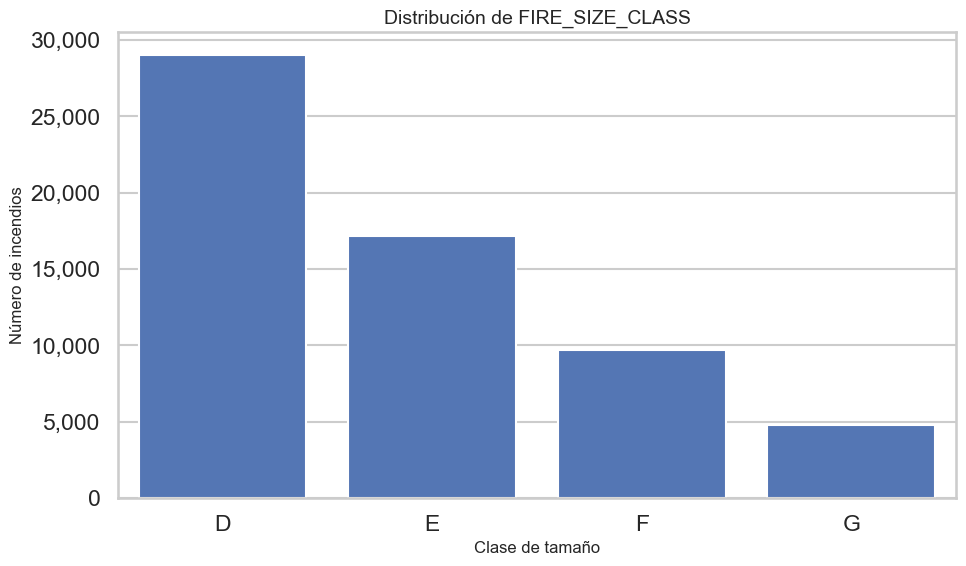

→ Figura guardada en: figs\02_top_nwcg_cause_classification.png


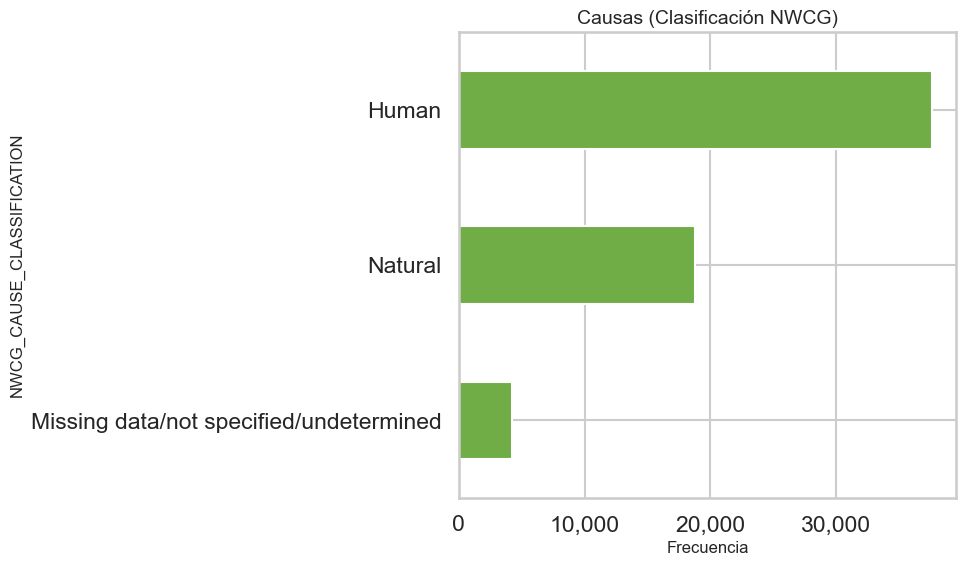

→ Figura guardada en: figs\02_top_nwcg_general_cause.png


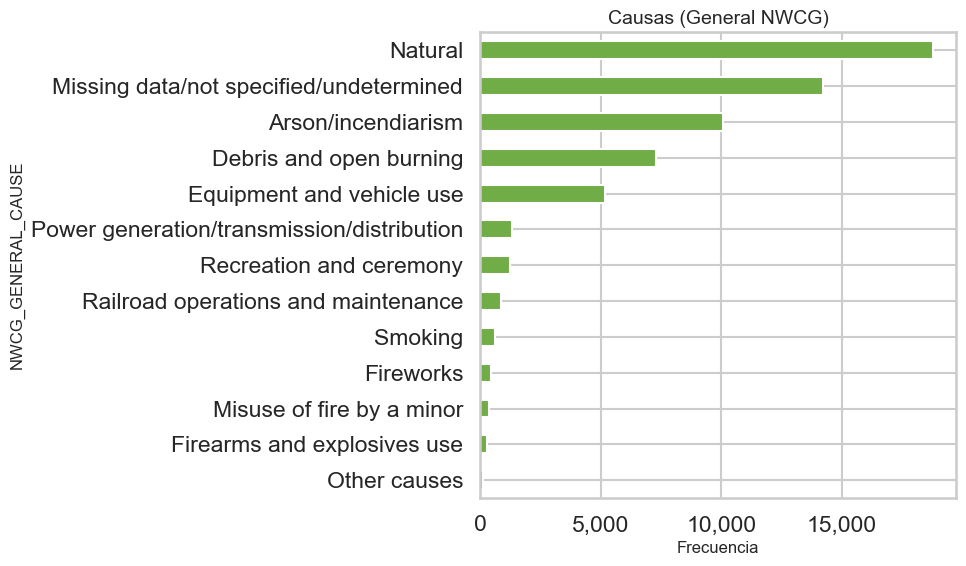

→ Figura guardada en: figs\02_top_owner_descr.png


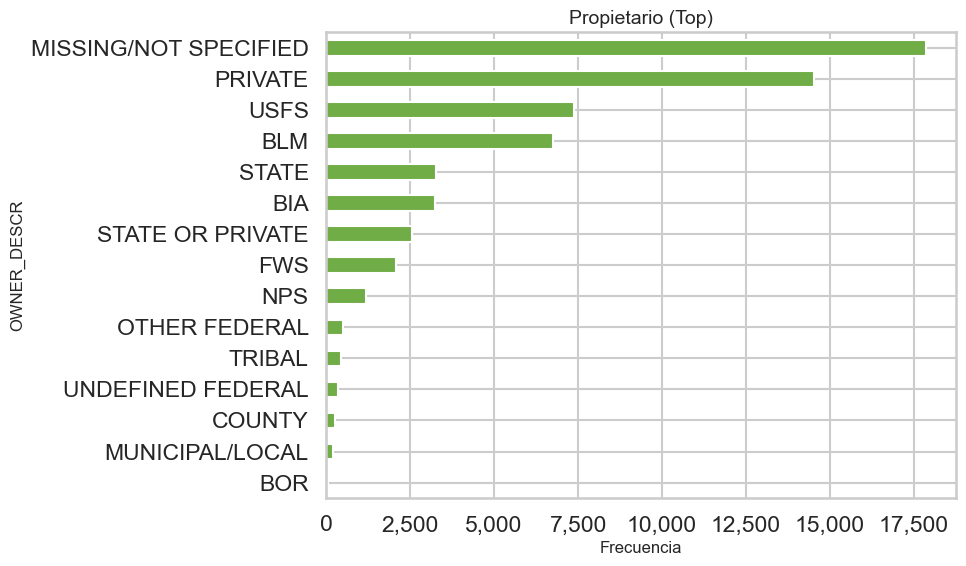

→ Figura guardada en: figs\02_top_state.png


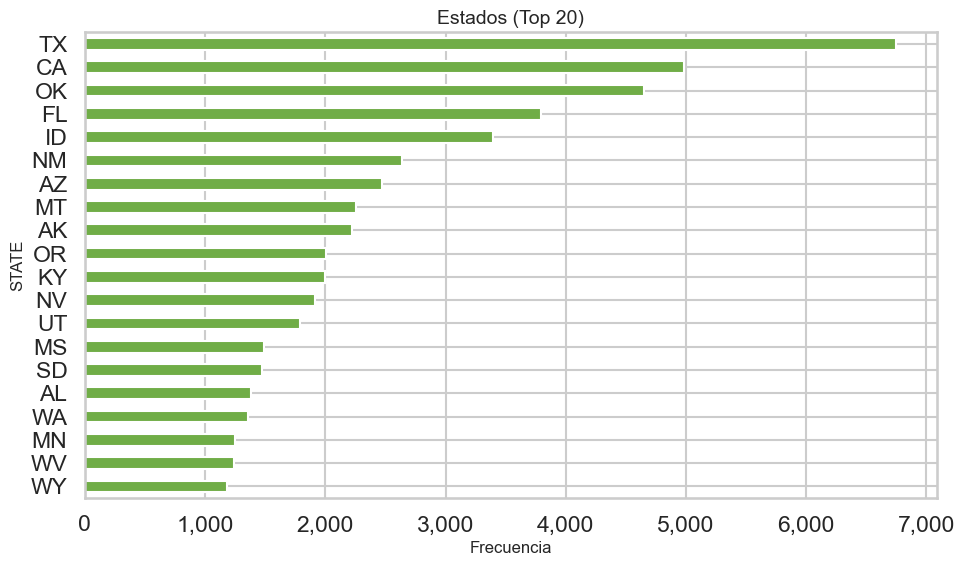

→ Figura guardada en: figs\03_dist_tmax.png


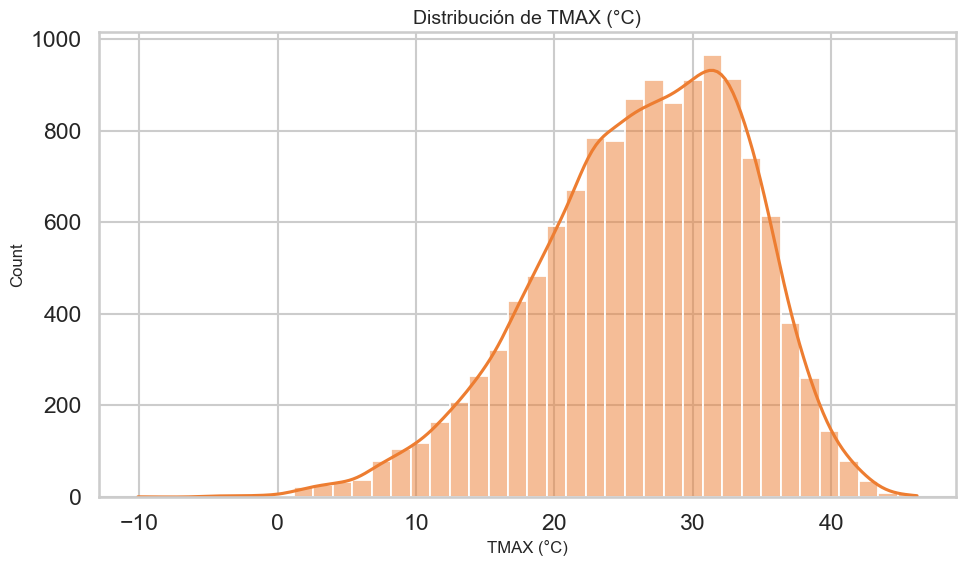

→ Figura guardada en: figs\04_dist_log10_firesize.png


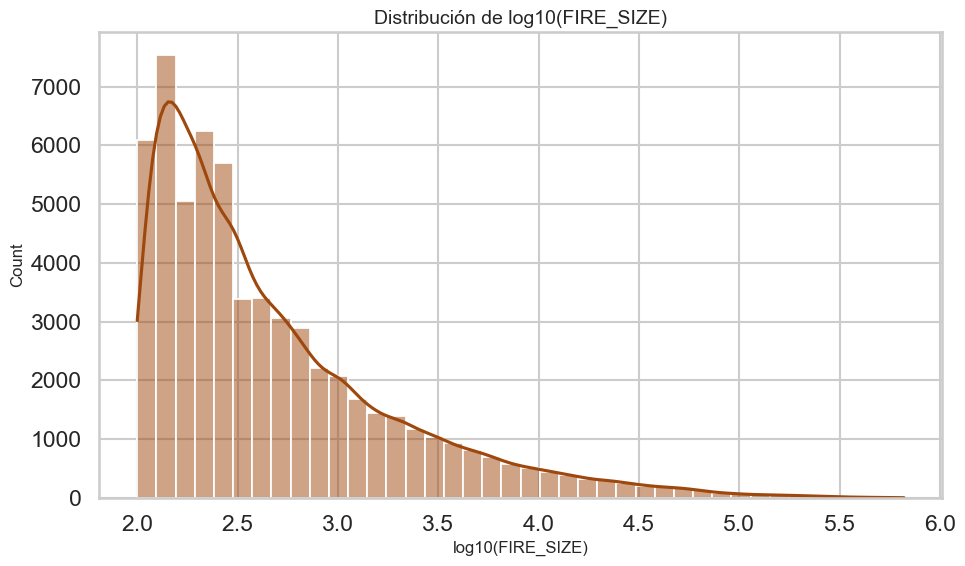

→ Figura guardada en: figs\05_tmax_por_clase.png


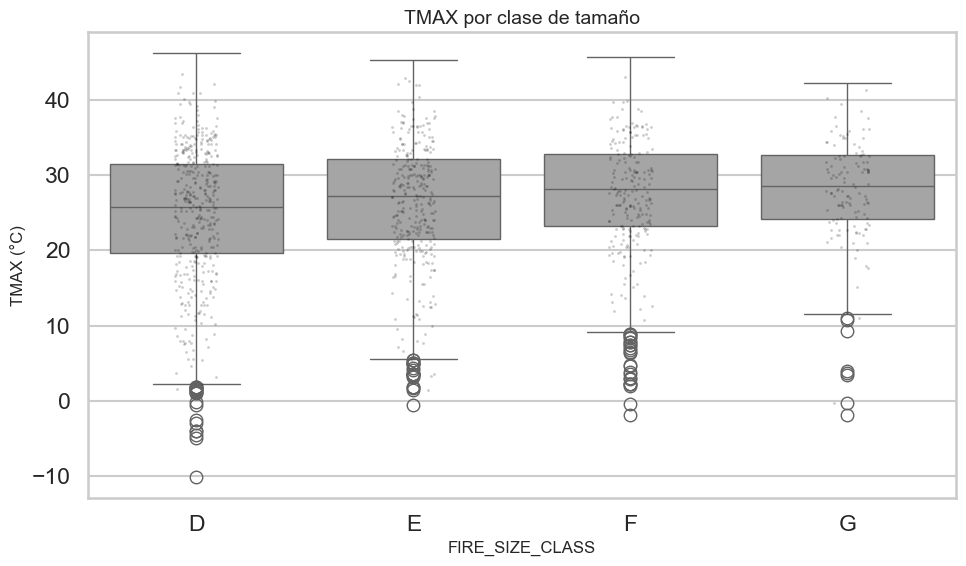

→ Figura guardada en: figs\06_violin_tmax_por_clase.png


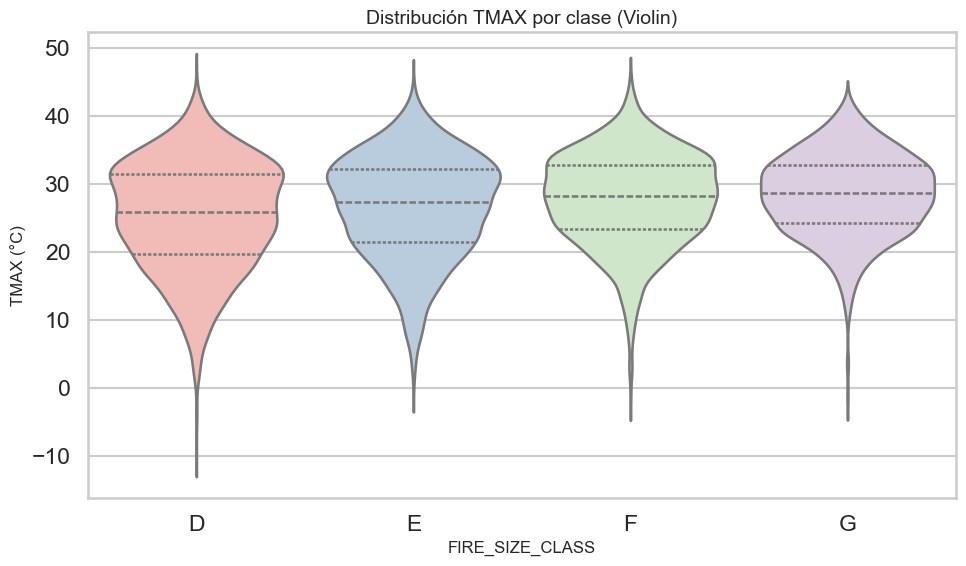

→ Figura guardada en: figs\07_incendios_por_anio.png


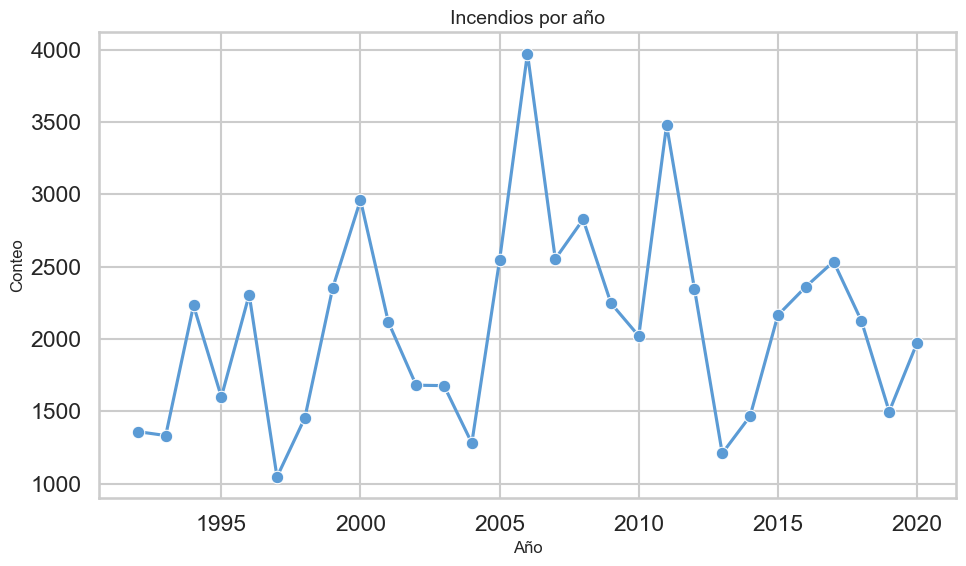

→ Figura guardada en: figs\08_incendios_por_mes.png


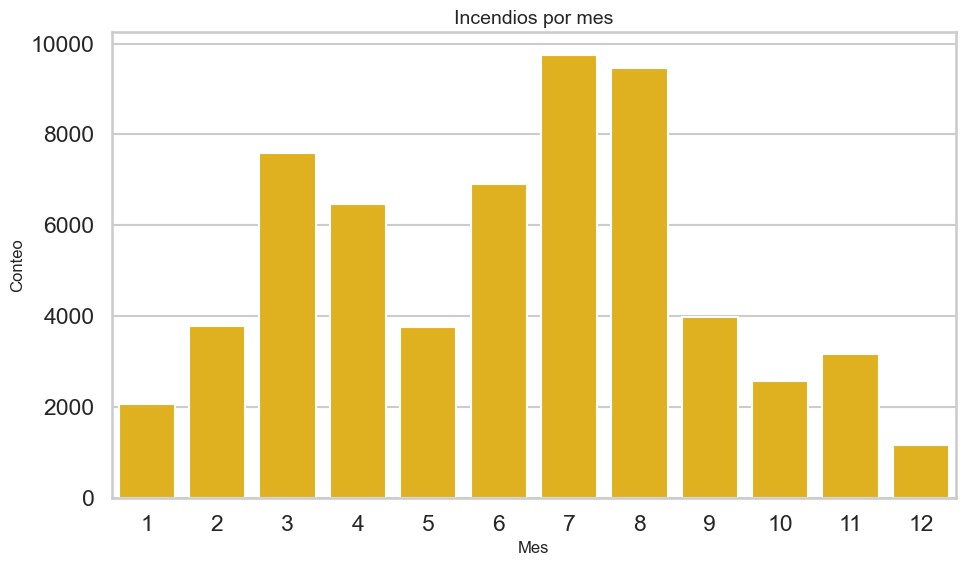

→ Figura guardada en: figs\09_incendios_por_doy.png


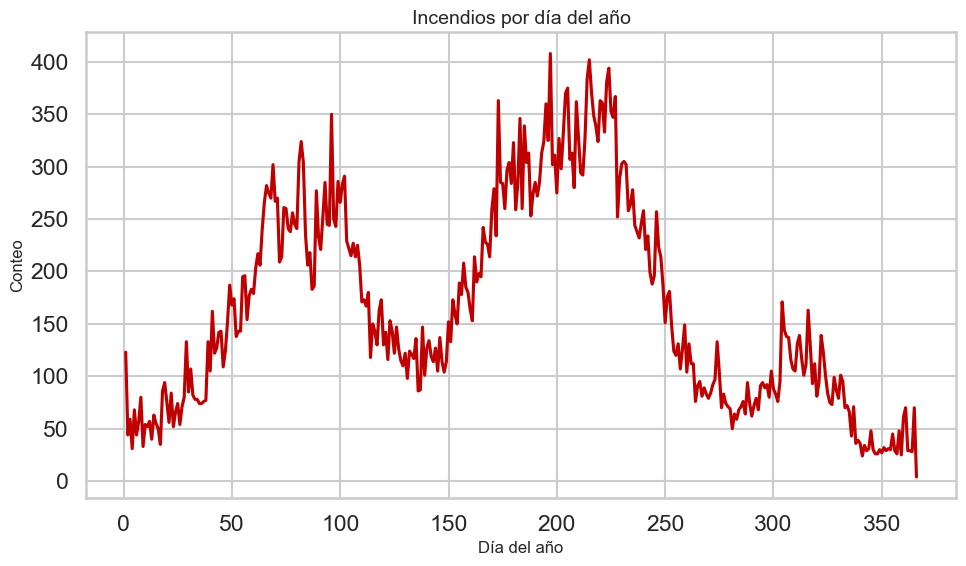

→ Figura guardada en: figs\10_hexbin_espacial.png


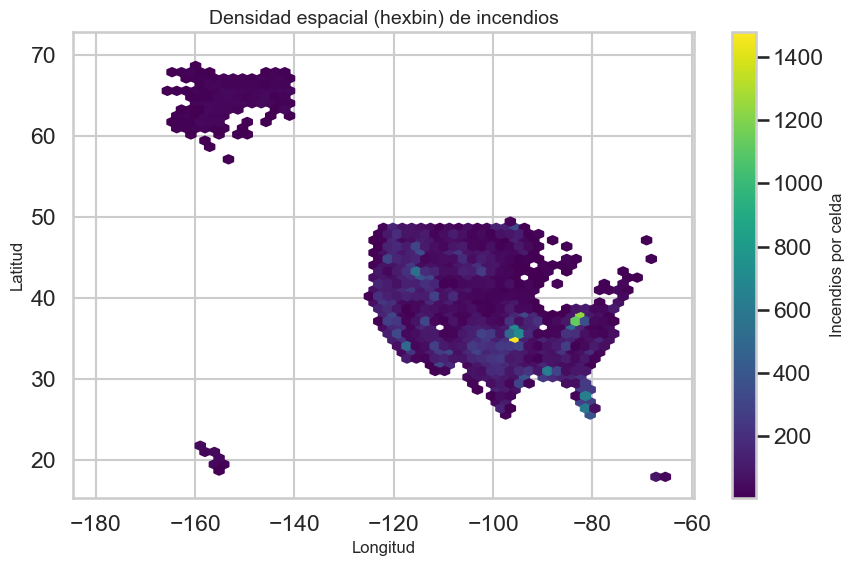

→ Figura guardada en: figs\11_hexbin_clase_promedio.png


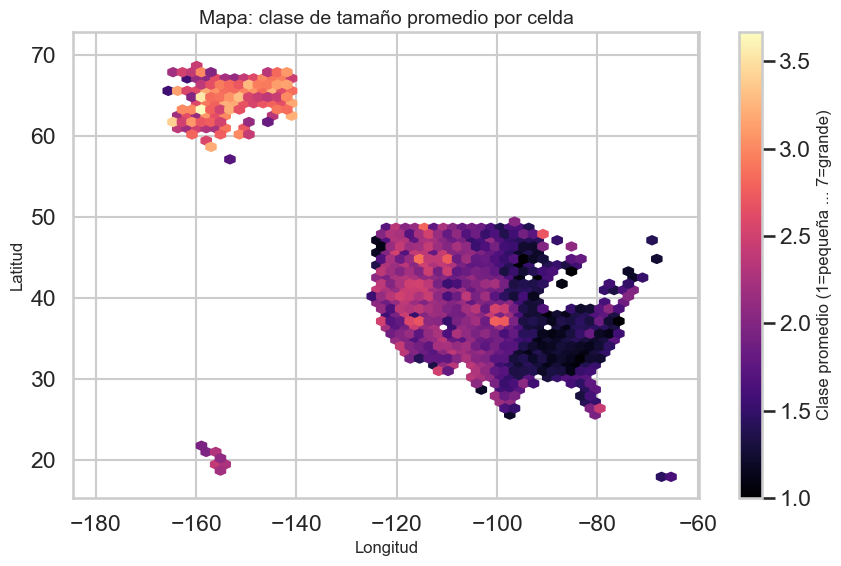

→ Figura guardada en: figs\12_heatmap_fire_size_class_vs_nwcg_cause_classification.png


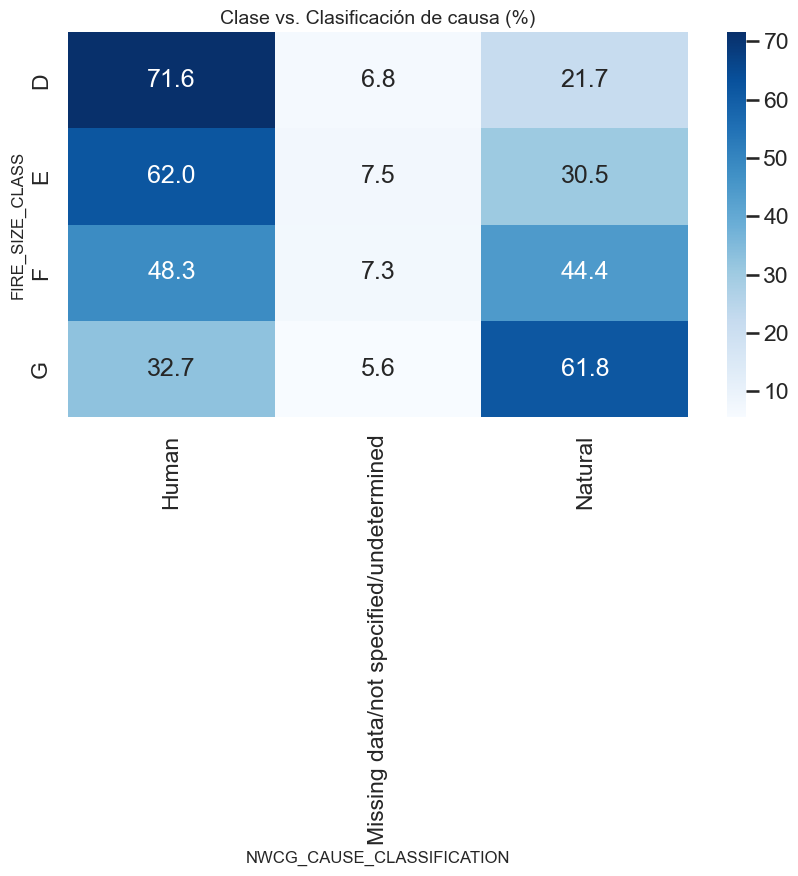

→ Figura guardada en: figs\12_heatmap_fire_size_class_vs_state.png


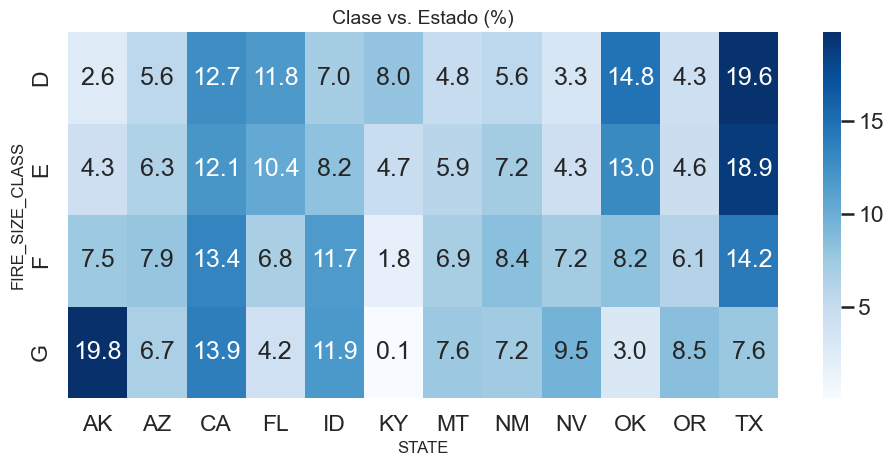

→ Figura guardada en: figs\12_heatmap_fire_size_class_vs_month.png


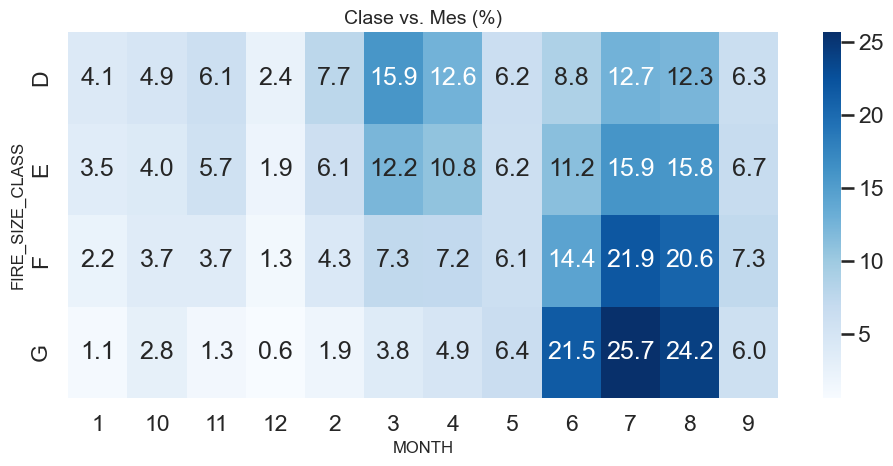


=== Mutual Information respecto a FIRE_SIZE_CLASS ===
FIRE_SIZE                    1.288677
LONGITUDE                    0.058164
STATE                        0.052596
LATITUDE                     0.038097
NWCG_GENERAL_CAUSE           0.028564
MONTH                        0.027850
DOY                          0.025474
SEASON                       0.025294
NWCG_CAUSE_CLASSIFICATION    0.023823
TMAX                         0.021318
OWNER_DESCR                  0.013208
FIRE_YEAR                    0.012620
dtype: float64
→ Figura guardada en: figs\13_mutual_information.png


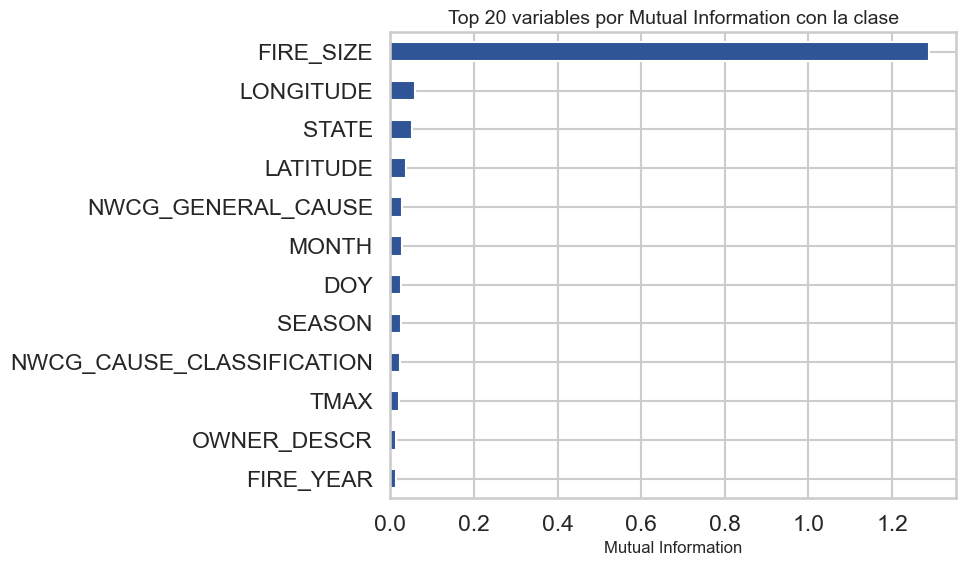


=== Pesos de clase sugeridos (para manejo de desbalance) ===
Clase D: 0.52
Clase E: 0.88
Clase F: 1.57
Clase G: 3.17

EDA finalizado. Figuras guardadas en: C:\Users\du11505\figs


In [4]:


# -----------------------------
# CONFIGURACIÓN GRÁFICA
# -----------------------------
sns.set(style="whitegrid", context="talk")
plt.rcParams["figure.figsize"] = (10, 6)
plt.rcParams["axes.titlesize"] = 14
plt.rcParams["axes.labelsize"] = 12

# -----------------------------
# FUNCIONES AUXILIARES
# -----------------------------



    # Estación (Meteorológica, Hemisferio Norte)
    # DJF=Invierno, MAM=Primavera, JJA=Verano, SON=Otoño
    month_to_season = {12: "Invierno", 1: "Invierno", 2: "Invierno",
                       3: "Primavera", 4: "Primavera", 5: "Primavera",
                       6: "Verano", 7: "Verano", 8: "Verano",
                       9: "Otoño", 10: "Otoño", 11: "Otoño"}
    df["SEASON"] = df["MONTH"].map(month_to_season).astype("category")
    return df

def quality_checks(df):
    print("\n=== Visión general ===")
    print("Filas, columnas:", df.shape)
    print("\nTipos de datos:")
    print(df.dtypes)

    print("\nValores faltantes (top 20):")
    print(df.isna().sum().sort_values(ascending=False).head(20))

    # Rangos plausibles
    if "LATITUDE" in df.columns and "LONGITUDE" in df.columns:
        invalid_lat = df[(df["LATITUDE"] < -90) | (df["LATITUDE"] > 90)].shape[0]
        invalid_lon = df[(df["LONGITUDE"] < -180) | (df["LONGITUDE"] > 180)].shape[0]
        print(f"\nLatitudes fuera de rango: {invalid_lat}")
        print(f"Longitudes fuera de rango: {invalid_lon}")

    if "TMAX" in df.columns:
        tmin, tmax = df["TMAX"].min(skipna=True), df["TMAX"].max(skipna=True)
        print(f"\nRango TMAX: [{tmin:.2f}, {tmax:.2f}] (°C esperados ~[-30, 60])")

    if "FIRE_SIZE" in df.columns:
        smin, smax = df["FIRE_SIZE"].min(skipna=True), df["FIRE_SIZE"].max(skipna=True)
        print(f"Rango FIRE_SIZE: [{smin:.2f}, {smax:.2f}]")

    # Duplicados básicos por (lat, lon, fecha)
    if set(["LATITUDE", "LONGITUDE", "EVENT_DATE"]).issubset(df.columns):
        dups = df.duplicated(subset=["LATITUDE", "LONGITUDE", "EVENT_DATE"]).sum()
        print(f"\nPosibles duplicados (misma lat/lon/fecha): {dups}")

def savefig_tight(path):
    plt.tight_layout()
    plt.savefig(path, dpi=150)
    print(f"→ Figura guardada en: {path}")

def plot_class_distribution(df, outdir):
    if "FIRE_SIZE_CLASS" not in df.columns:
        return
    counts = df["FIRE_SIZE_CLASS"].value_counts().sort_index()
    ax = sns.barplot(x=counts.index.astype(str), y=counts.values, color="#4472C4")
    plt.title("Distribución de FIRE_SIZE_CLASS")
    plt.xlabel("Clase de tamaño")
    plt.ylabel("Número de incendios")
    plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, p: f"{int(x):,}"))
    savefig_tight(os.path.join(outdir, "01_fire_size_class.png"))
    plt.show()

def plot_top_categories(df, col, outdir, top=15, title=None):
    if col not in df.columns: 
        return
    vc = df[col].astype(str).value_counts().head(top)[::-1]
    ax = vc.plot(kind="barh", color="#70AD47")
    plt.title(title or f"Top {top} en {col}")
    plt.xlabel("Frecuencia")
    plt.ylabel(col)
    plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x, p: f"{int(x):,}"))
    savefig_tight(os.path.join(outdir, f"02_top_{col.lower()}.png"))
    plt.show()

def plot_numeric_dists(df, outdir):
    # TMAX
    if "TMAX" in df.columns:
        sns.histplot(df["TMAX"], kde=True, color="#ED7D31", bins=40)
        plt.title("Distribución de TMAX (°C)")
        plt.xlabel("TMAX (°C)")
        savefig_tight(os.path.join(outdir, "03_dist_tmax.png"))
        plt.show()

    # FIRE_SIZE (log)
    if "FIRE_SIZE" in df.columns:
        vals = df["FIRE_SIZE"].replace(0, np.nan).dropna()
        sns.histplot(np.log10(vals), kde=True, color="#9E480E", bins=40)
        plt.title("Distribución de log10(FIRE_SIZE)")
        plt.xlabel("log10(FIRE_SIZE)")
        savefig_tight(os.path.join(outdir, "04_dist_log10_firesize.png"))
        plt.show()

def plot_tmax_by_class(df, outdir):
    if set(["TMAX", "FIRE_SIZE_CLASS"]).issubset(df.columns):
        # Boxplot + strip
        sns.boxplot(data=df, x="FIRE_SIZE_CLASS", y="TMAX", color="#A5A5A5")
        sns.stripplot(data=df.sample(min(5000, len(df))), x="FIRE_SIZE_CLASS", y="TMAX",
                      color="black", alpha=0.2, size=2)
        plt.title("TMAX por clase de tamaño")
        plt.xlabel("FIRE_SIZE_CLASS")
        plt.ylabel("TMAX (°C)")
        savefig_tight(os.path.join(outdir, "05_tmax_por_clase.png"))
        plt.show()

        # Violin (opcional)
        sns.violinplot(data=df, x="FIRE_SIZE_CLASS", y="TMAX", inner="quartile", palette="Pastel1")
        plt.title("Distribución TMAX por clase (Violin)")
        plt.xlabel("FIRE_SIZE_CLASS")
        plt.ylabel("TMAX (°C)")
        savefig_tight(os.path.join(outdir, "06_violin_tmax_por_clase.png"))
        plt.show()

def plot_temporal(df, outdir):
    if "YEAR" in df.columns:
        yearly = df.groupby("YEAR").size()
        sns.lineplot(x=yearly.index, y=yearly.values, marker="o", color="#5B9BD5")
        plt.title("Incendios por año")
        plt.xlabel("Año")
        plt.ylabel("Conteo")
        savefig_tight(os.path.join(outdir, "07_incendios_por_anio.png"))
        plt.show()

    if "MONTH" in df.columns:
        monthly = df.groupby("MONTH").size()
        sns.barplot(x=monthly.index, y=monthly.values, color="#FFC000")
        plt.title("Incendios por mes")
        plt.xlabel("Mes")
        plt.ylabel("Conteo")
        savefig_tight(os.path.join(outdir, "08_incendios_por_mes.png"))
        plt.show()

    if "DOY" in df.columns:
        doy = df.groupby("DOY").size()
        sns.lineplot(x=doy.index, y=doy.values, color="#C00000")
        plt.title("Incendios por día del año")
        plt.xlabel("Día del año")
        plt.ylabel("Conteo")
        savefig_tight(os.path.join(outdir, "09_incendios_por_doy.png"))
        plt.show()

def plot_spatial_hexbin(df, outdir):
    if not set(["LATITUDE", "LONGITUDE"]).issubset(df.columns):
        return
    plt.figure(figsize=(9,6))
    hb = plt.hexbin(df["LONGITUDE"], df["LATITUDE"], gridsize=60, cmap="viridis", mincnt=5)
    plt.colorbar(hb, label="Incendios por celda")
    plt.title("Densidad espacial (hexbin) de incendios")
    plt.xlabel("Longitud")
    plt.ylabel("Latitud")
    savefig_tight(os.path.join(outdir, "10_hexbin_espacial.png"))
    plt.show()

    # Hexbin por tamaño medio (si existe FIRE_SIZE_CLASS)
    if "FIRE_SIZE_CLASS" in df.columns:
        # Mapear clase a orden numérico (A=1... G=7 o según tu codificación real)
        # Si ya vienen como letras: ordénalas. Si ya es categórica con orden, respétalo.
        classes = sorted(df["FIRE_SIZE_CLASS"].dropna().unique())
        if isinstance(classes[0], str):
            # A..G
            order = {c:i+1 for i,c in enumerate(sorted(classes))}
        else:
            # Numéricas 0..6
            order = {int(c): int(c)+1 for c in classes}
        num_class = df["FIRE_SIZE_CLASS"].map(order)

        plt.figure(figsize=(9,6))
        hb = plt.hexbin(df["LONGITUDE"], df["LATITUDE"], C=num_class, reduce_C_function=np.mean,
                        gridsize=60, cmap="magma", mincnt=5)
        plt.colorbar(hb, label="Clase promedio (1=pequeña ... 7=grande)")
        plt.title("Mapa: clase de tamaño promedio por celda")
        plt.xlabel("Longitud")
        plt.ylabel("Latitud")
        savefig_tight(os.path.join(outdir, "11_hexbin_clase_promedio.png"))
        plt.show()

def crosstab_heatmap(df, row, col, outdir, normalize="index", top_rows=10, top_cols=10, title=None):
    if row not in df.columns or col not in df.columns:
        return
    # Selecciona top categorías
    r_top = df[row].astype(str).value_counts().head(top_rows).index
    c_top = df[col].astype(str).value_counts().head(top_cols).index
    sub = df[df[row].astype(str).isin(r_top) & df[col].astype(str).isin(c_top)]
    ct = pd.crosstab(sub[row].astype(str), sub[col].astype(str), normalize=normalize) * 100.0
    plt.figure(figsize=(10, max(5, 0.4*len(r_top))))
    sns.heatmap(ct, annot=True, fmt=".1f", cmap="Blues")
    plt.title(title or f"{row} vs {col} (% por {normalize})")
    plt.xlabel(col)
    plt.ylabel(row)
    savefig_tight(os.path.join(outdir, f"12_heatmap_{row.lower()}_vs_{col.lower()}.png"))
    plt.show()

def mutual_information_report(df, target, outdir, cat_cols=None, num_cols=None):
    if target not in df.columns:
        return
    # Codifica target a entero
    le_y = LabelEncoder()
    y = le_y.fit_transform(df[target].astype(str))

    # Identifica columnas
    if cat_cols is None:
        cat_cols = [c for c in df.select_dtypes(["category", "object"]).columns if c != target]
    if num_cols is None:
        num_cols = [c for c in df.select_dtypes(["float64", "int64"]).columns if c not in ["FIRE_SIZE"]]

    # Prepara matriz
    X = pd.DataFrame(index=df.index)
    disc_cats = []
    for c in cat_cols:
        # Label encoding por columna (evitar fuga global)
        le = LabelEncoder()
        vals = df[c].astype(str)
        X[c] = le.fit_transform(vals)
        disc_cats.append(c)
    for c in num_cols:
        X[c] = df[c]

    # Quita filas con NA
    mask = X.notna().all(axis=1) & pd.Series(~pd.isna(y), index=X.index)
    X2 = X[mask]
    y2 = y[mask]

    # Calcula MI
    mi = mutual_info_classif(X2, y2, discrete_features=[X2.columns.get_loc(c) for c in disc_cats], random_state=42)
    mi_series = pd.Series(mi, index=X2.columns).sort_values(ascending=False)
    print("\n=== Mutual Information respecto a FIRE_SIZE_CLASS ===")
    print(mi_series.head(20))

    ax = mi_series.head(20)[::-1].plot(kind="barh", color="#2F5597")
    plt.title("Top 20 variables por Mutual Information con la clase")
    plt.xlabel("Mutual Information")
    savefig_tight(os.path.join(outdir, "13_mutual_information.png"))
    plt.show()

def compute_class_weights(df, target="FIRE_SIZE_CLASS"):
    if target not in df.columns:
        return None
    counts = df[target].value_counts().sort_index()
    total = counts.sum()
    k = counts.shape[0]
    # Peso inverso proporcional, normalizado por el mínimo y cap a 20x
    weights = (total / (k * counts)).clip(upper=(total/(k*counts.min()))*20)
    w = weights.to_dict()
    print("\n=== Pesos de clase sugeridos (para manejo de desbalance) ===")
    for cls, val in w.items():
        print(f"Clase {cls}: {val:.2f}")
    return w



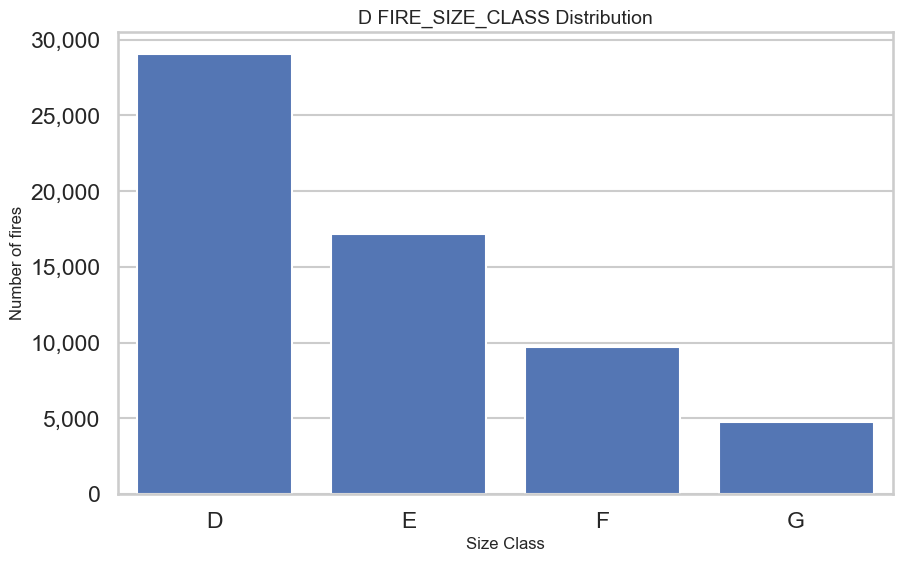

In [35]:
# plot_class_distribution(df, outdir):

counts = df["FIRE_SIZE_CLASS"].value_counts().sort_index()
ax = sns.barplot(x=counts.index.astype(str), y=counts.values, color="#4472C4")
plt.title("D FIRE_SIZE_CLASS Distribution")
plt.xlabel("Size Class")
plt.ylabel("Number of fires")
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, p: f"{int(x):,}"))
# savefig_tight(os.path.join(outdir, "01_fire_size_class.png"))
plt.show()

In [ ]:
# -----------------------------
# MAIN
# -----------------------------
def run_eda(csv_path, outdir="figs", sep=","):
    os.makedirs(outdir, exist_ok=True)
    df = load_data(csv_path, sep=sep)
    df = add_time_features(df)
    quality_checks(df)

    # Gráficos básicos
    plot_class_distribution(df, outdir)
    plot_top_categories(df, "NWCG_CAUSE_CLASSIFICATION", outdir, title="Causas (Clasificación NWCG)")
    plot_top_categories(df, "NWCG_GENERAL_CAUSE", outdir, title="Causas (General NWCG)")
    plot_top_categories(df, "OWNER_DESCR", outdir, title="Propietario (Top)")
    plot_top_categories(df, "STATE", outdir, top=20, title="Estados (Top 20)")

    plot_numeric_dists(df, outdir)
    plot_tmax_by_class(df, outdir)
    plot_temporal(df, outdir)
    plot_spatial_hexbin(df, outdir)

    # Tablas cruzadas relevantes
    crosstab_heatmap(df, "FIRE_SIZE_CLASS", "NWCG_CAUSE_CLASSIFICATION", outdir,
                     normalize="index", title="Clase vs. Clasificación de causa (%)")
    crosstab_heatmap(df, "FIRE_SIZE_CLASS", "STATE", outdir,
                     normalize="index", top_rows=7, top_cols=12, title="Clase vs. Estado (%)")
    crosstab_heatmap(df, "FIRE_SIZE_CLASS", "MONTH", outdir,
                     normalize="index", top_rows=7, top_cols=12, title="Clase vs. Mes (%)")

    # Mutual Information (importancia preliminar)
    cat_cols = ["NWCG_CAUSE_CLASSIFICATION", "NWCG_GENERAL_CAUSE", "OWNER_DESCR", "STATE", "SEASON"]
    num_cols = ["LATITUDE", "LONGITUDE", "TMAX", "MONTH", "DOY", "FIRE_YEAR", "FIRE_SIZE"]
    mutual_information_report(df, target="FIRE_SIZE_CLASS", outdir=outdir, cat_cols=[c for c in cat_cols if c in df.columns],
                              num_cols=[c for c in num_cols if c in df.columns])

    # Pesos de clase
    compute_class_weights(df, target="FIRE_SIZE_CLASS")

    print(f"\nEDA finalizado. Figuras guardadas en: {os.path.abspath(outdir)}")

if __name__ == "__main__":
    # Cambia 'incendios_usa.csv' por la ruta real de tu archivo
    run_eda("wildfires_greather_than_100acres_with_temperature.csv", outdir="figs", sep=",")